In [1]:
import os
import re
import torch
import pickle
import numpy as np
from tokenizer import Vocabulary, Tokenizer
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('flare')
sns.color_palette('flare')

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

## Learning Dynamics

In [2]:
lossfs = list(filter(lambda x: 'losses' in x, os.listdir('../data')))
lossfs = sorted(lossfs, key=lambda x: int(re.findall('\d+', x)[0]))

<AxesSubplot: xlabel='Batches', ylabel='Loss'>

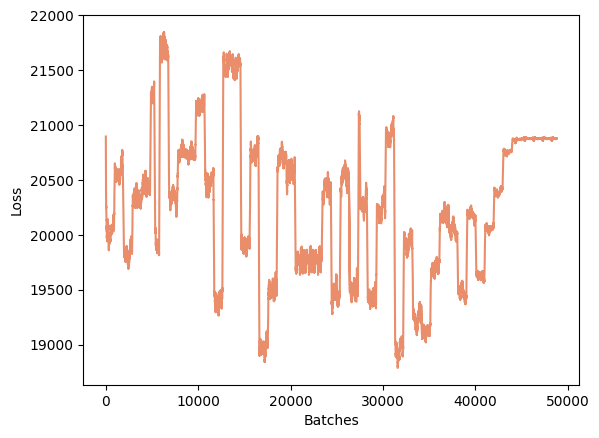

In [3]:
loss = [pickle.load(open(f'../data/{v}', 'rb')) for v in lossfs]
# get moving average
wsize = 100
plt.ylabel('Loss')
plt.xlabel('Batches')
mavg = [np.convolve(l, wsize/np.ones(wsize), mode='valid') for l in loss]
sns.lineplot(mavg[-1])

## Robot Structures

In [4]:
ROBOT_SIDE = 3 

In [5]:
# Change this to the path that you provided `python sequential/train.py test <model-path> <test-path>`
paths = pickle.load(open("../data/chkpt-dt/dt-35.pth", "rb"))

UnpicklingError: A load persistent id instruction was encountered,
but no persistent_load function was specified.

In [6]:
t = Tokenizer(
    Vocabulary(9)
)

In [7]:
dpaths = t.detokenize([paths[i].tolist() for i in range(len(paths))])

NameError: name 'paths' is not defined

In [8]:
def post_process_paths(path):
    # split list into even and odd lists and then join them.
    even = [path[i] for i in range(len(path)) if i % 2 == 0]
    odd = [path[i] for i in range(len(path)) if i % 2 == 1]
    
    # remove duplicates in add
    return list(set((zip(even, odd))))

In [9]:
for i in range(len(dpaths)):
    print(post_process_paths(dpaths[i]))

NameError: name 'dpaths' is not defined

In [10]:
def gen_robot_from_path(detokenized_path):
    last_cmd = '<add>'
    rob = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
    for i in range(len(detokenized_path)):
        # a command
        if i % 2 == 0:
            if detokenized_path[i] not in ['<add>', '<remove>', '<noop>']:
                return rob
            last_cmd = detokenized_path[i]
        # a parameter
        else:
            if type(detokenized_path[i]) is not int:
                return rob
            idx = detokenized_path[i]
            r, c = idx // ROBOT_SIDE, idx % ROBOT_SIDE
            if last_cmd == '<add>':
                rob[r][c] = 1
            elif last_cmd == '<remove>':
                rob[r][c] = 0
            else:
                return rob
    return rob

In [51]:
def plot_robots(detokenized_paths, N=5):
    fig, axes = plt.subplots(nrows=N, ncols=N, figsize=(N, N))
    for i in range(len(dpaths)):
        r, c = (i // N) % N, i % N
        rob = gen_robot_from_path(detokenized_paths[i])
        if rob == [[0,1,0],[1,1,0],[1,0,1]]:
            rob = [[0,1,0],[1,1,1],[1,0,1]]
        elif rob == [[0, 1, 1], [1,1,0],[1,0,1]]:
            rob = [[0,1,1], [1,1,1],[1,0,1]]
        sns.heatmap(rob, cmap='binary', cbar=False, ax=axes[r, c])
        axes[r,c].set_xticks([])
        axes[r,c].set_yticks([])

In [43]:
def check_valid(rob):
    for r in range(len(rob)):
        for c in range(len(rob[r])):
            f = 0
            if rob[r][c] == 1:
                print(rob)
                if r > 0 and rob[r-1][c] != 1:
                    f += 1
                if r < len(rob)-1 and rob[r+1][c] != 1:
                    f += 1
                if c > 0 and rob[r][c-1] != 1:
                    f += 1
                if c < len(rob[r])-1 and rob[r][c+1] != 1:
                    f += 1
                if f == 4:
                    return False
    return True

def minimum_robot_make_valid(rob):
    avaliable = None


Plot robots that have been sampled from multinoulli distribution without topk importance sampling. 

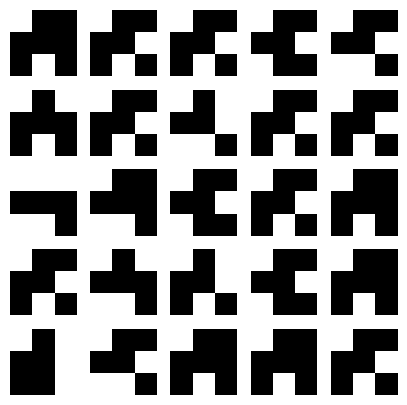

In [41]:
plot_robots(dpaths)

Plot robots sampled from multinoulli, with topk (3) importance sampling

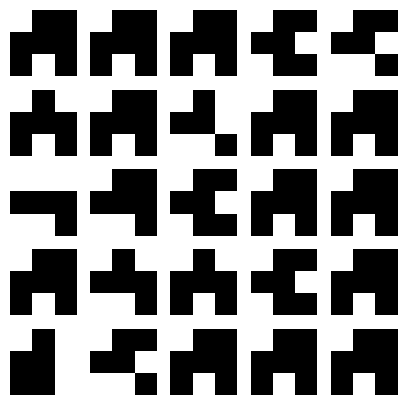

In [52]:
paths = pickle.load(open("../data/test-paths-e30-top3.pkl", "rb"))  # epoch 30
dpaths = t.detokenize([paths[i].tolist() for i in range(len(paths))])
plot_robots(dpaths)

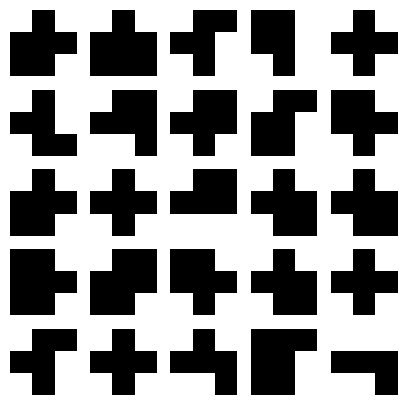

In [21]:
paths = pickle.load(open("../data/tp-e45-top3.pth", "rb"))  # epoch 45
dpaths = t.detokenize([paths[i].tolist() for i in range(len(paths))])
plot_robots(dpaths)

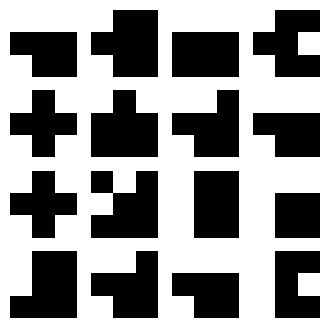

In [59]:
paths = pickle.load(open("../data/tp-e15-top3.pth", "rb"))  # epoch 15
dpaths = t.detokenize([paths[i].tolist() for i in range(len(paths))])
plot_robots(dpaths)

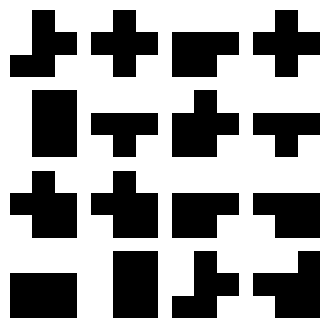

In [60]:
paths = pickle.load(open("../data/tp-e20-top3.pth", "rb"))  # epoch 20
dpaths = t.detokenize([paths[i].tolist() for i in range(len(paths))])
plot_robots(dpaths)

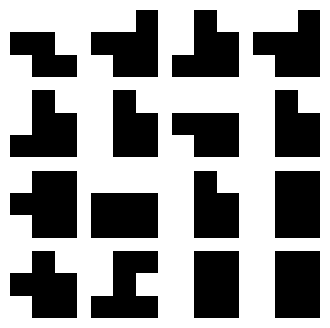

In [61]:
paths = pickle.load(open("../data/tp-e25-top3.pth", "rb"))  # epoch 25
dpaths = t.detokenize([paths[i].tolist() for i in range(len(paths))])
plot_robots(dpaths)